<a href="https://colab.research.google.com/github/datxander/Process-mining/blob/main/NetworkX_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference link

https://www.kaggle.com/code/alireza151/networkx-tutorial


In [1]:
!pip install networkx

In [2]:
import networkx as nx

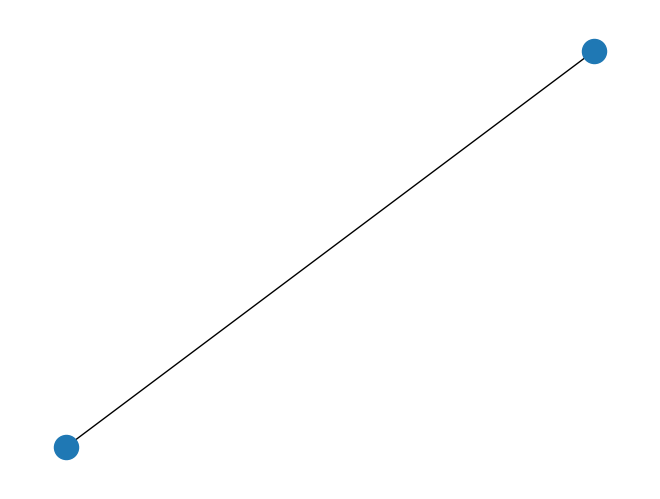

In [3]:
# Draw a simple network - Undirected & unweighted

G = nx.Graph()
G.add_edge("A", "B")

nx.draw(G)

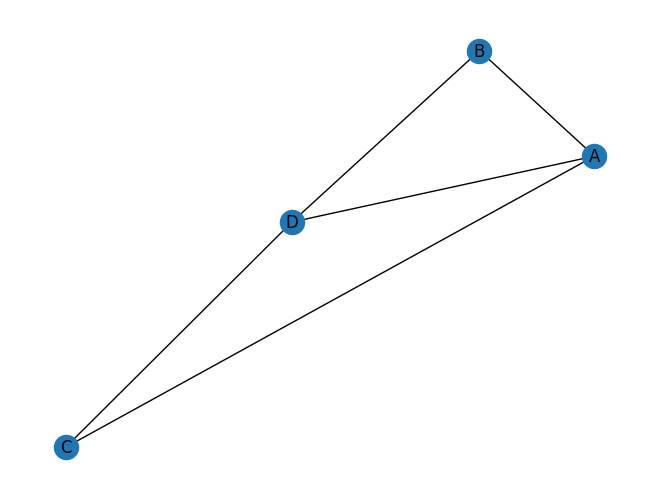

In [5]:
# Weighted network

G_W = nx.Graph()

G_W.add_edge("A", "B", weight=6)
G_W.add_edge("A", "C", weight=0.2)
G_W.add_edge("A", "D", weight=3)
G_W.add_edge("B", "D", weight=2)
G_W.add_edge("C", "D", weight=1)

nx.draw(G_W, with_labels = True)

In [6]:
# List the edges alone
list(G_W.edges())

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'D'), ('C', 'D')]

In [7]:
# List them with their weights
list(G_W.edges(data = True))

[('A', 'B', {'weight': 6}),
 ('A', 'C', {'weight': 0.2}),
 ('A', 'D', {'weight': 3}),
 ('B', 'D', {'weight': 2}),
 ('C', 'D', {'weight': 1})]

In [11]:
# Get the dictionary elements from this
G_W.edges["A", "D"]
G_W.edges["B", "D"]["weight"]


2

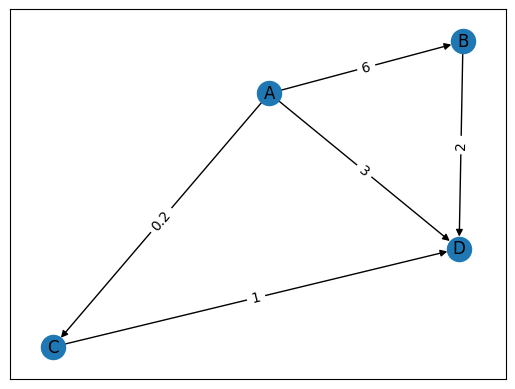

In [19]:
# Directed graphs

G_D = nx.DiGraph()

G_D.add_edge("A", "B", weight=6)
G_D.add_edge("A", "C", weight=0.2)
G_D.add_edge("A", "D", weight=3)
G_D.add_edge("B", "D", weight=2)
G_D.add_edge("C", "D", weight=1)

# Create a dictionary for node positions

#pos = nx.spring_layout(G_D)
#pos = nx.circular_layout(G_D)
#pos = nx.spectral_layout(G_D)
#pos = nx.shell_layout(G_D)
#pos = nx.kamada_kawai_layout(G_D)
pos = nx.fruchterman_reingold_layout(G_D)


# Draw the graph

nx.draw_networkx_nodes(G_D, pos)
nx.draw_networkx_edges(G_D, pos)
nx.draw_networkx_labels(G_D, pos)

# Create a dictionary for edge labels

edge_labels = dict([((u, v), d["weight"]) for u, v, d in G_D.edges(data = True)])

# Draw the edge labels
nx.draw_networkx_edge_labels(G_D, pos, edge_labels = edge_labels)

# Display the plot
import matplotlib.pyplot as plt
plt.show()


Each layout algorithm has its strengths and weaknesses, and the best one to use depends on the characteristics of the graph and the goals of the visualization. NetworkX allows you to easily apply these layout algorithms to your graphs and create visualizations that help you understand and communicate the structure of the network.






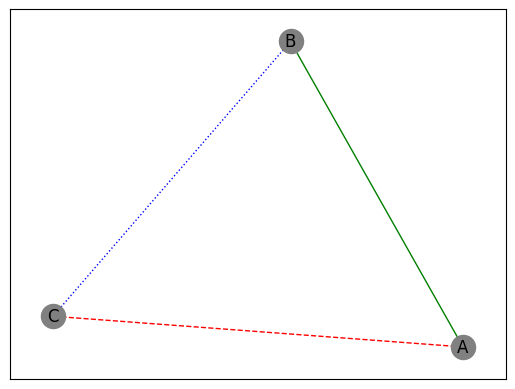

In [23]:
# Signed network

S_G = nx.Graph()

S_G.add_edge("A", "B", sign="+")
S_G.add_edge("A", "C", sign="-")
S_G.add_edge("B", "C", sign = "*")

# Choose layout
pos = nx.fruchterman_reingold_layout(S_G)

# Create dictionary of edge colors based on their signs
edge_colors = {'+' : 'green', '-' : 'red', '*' : 'blue'}
colors = [edge_colors[S_G[u][v]['sign']] for u,v in S_G.edges()]

# Create a dictionary of edge styles too
edge_styles = {'+' : 'solid', '-' : 'dashed', '*' : 'dotted'}
styles = [edge_styles[S_G[u][v]['sign']] for u,v in S_G.edges()]

# Draw the graph
nx.draw_networkx_nodes(S_G, pos, node_color = 'grey')
nx.draw_networkx_edges(S_G, pos, edge_color = colors, style = styles)
nx.draw_networkx_labels(S_G, pos)

# Display plot
plt.show()

# Multigraph

A MultiGraph is a type of graph in NetworkX that allows multiple edges between a pair of nodes. In other words, a MultiGraph can have parallel edges, while a standard Graph can only have a single edge between any pair of nodes.

In simpler terms, a MultiGraph is a network where multiple edges can connect the same nodes.

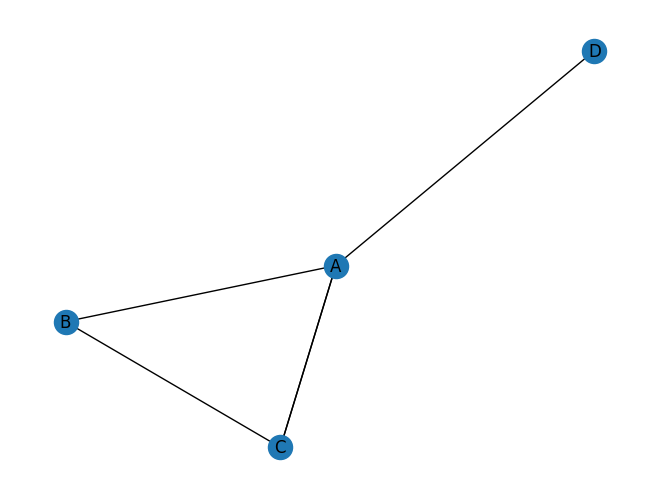

In [24]:
#Multigraph

M_G = nx.MultiGraph()

M_G.add_edge("A", "B", relation = "Firm", weight = 3)
M_G.add_edge("A", "C", relation = "City", weight = 4)
M_G.add_edge("B", "C", relation = "College", weight = 2)
M_G.add_edge("A", "D", relation = "State", weight = 2)
M_G.add_edge("C", "A", relation = "State", weight = 2)

nx.draw(M_G, with_labels = True)







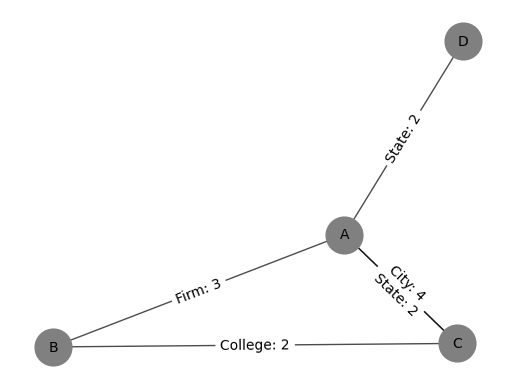

In [27]:
# Let's draw a better visual

# Node positions
pos = nx.fruchterman_reingold_layout(M_G)

#Draw the nodes
nx.draw_networkx_nodes(M_G,pos,node_color = 'grey',node_size = 700)

#Draw the edges
edge_labels = {}
for u,v,d in M_G.edges(data = True):
  if(u,v) in edge_labels:
    edge_labels[(u,v)] += "\n" + d["relation"] + ": " + str(d["weight"])
  else:
    edge_labels[(u,v)] = d["relation"] + ": " + str(d["weight"])

nx.draw_networkx_edges(M_G,pos,width = 1, alpha= 0.7)
nx.draw_networkx_edge_labels(M_G,pos,edge_labels = edge_labels,font_size = 10)
nx.draw_networkx_labels(M_G,pos, font_size=10,font_family = "sans-serif")

plt.axis('off')
plt.show()


